In [1]:
import numpy as np
from SynthTempNetwork import Individual, SynthTempNetwork
from TemporalNetwork import ContTempNetwork, StaticTempNetwork
from FlowStability import SparseClustering, FlowIntegralClustering, run_multi_louvain, avg_norm_var_information
import parallel_clustering
import pickle

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.gridspec import GridSpec
import matplotx

from scipy.sparse import (lil_matrix, dok_matrix, diags, eye, isspmatrix_csr, isspmatrix,
                          csr_matrix, coo_matrix, csc_matrix)
from scipy.sparse.linalg import eigsh

from SparseStochMat import sparse_autocov_mat
import auxiliary_functions

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.image as mpimg

Could not load sparse_dot_mkl. Will use scipy.sparse for matrix products.


In [2]:
net_heat = ContTempNetwork.load('evolving_SBM_net1')

In [3]:
# Example matrices for demonstration
matrix1 = net_heat.compute_static_adjacency_matrix(start_time=0, end_time=100).toarray()
matrix2 = net_heat.compute_static_adjacency_matrix(start_time=100, end_time=200).toarray()
matrix3 = net_heat.compute_static_adjacency_matrix(start_time=200, end_time=300).toarray()

In [4]:
# Define the time intervals for the x-axis
time_intervals = [(0, 100), (100, 200),  (200, 300)]

In [5]:
motifs = [[matrix1, matrix2, matrix3], [matrix3, matrix2, matrix1], [matrix1, matrix3, matrix2], [matrix2, matrix3, matrix1], [matrix2, matrix1, matrix3], [matrix3, matrix1, matrix2]]

/tmp/ipykernel_3665435/4006712198.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


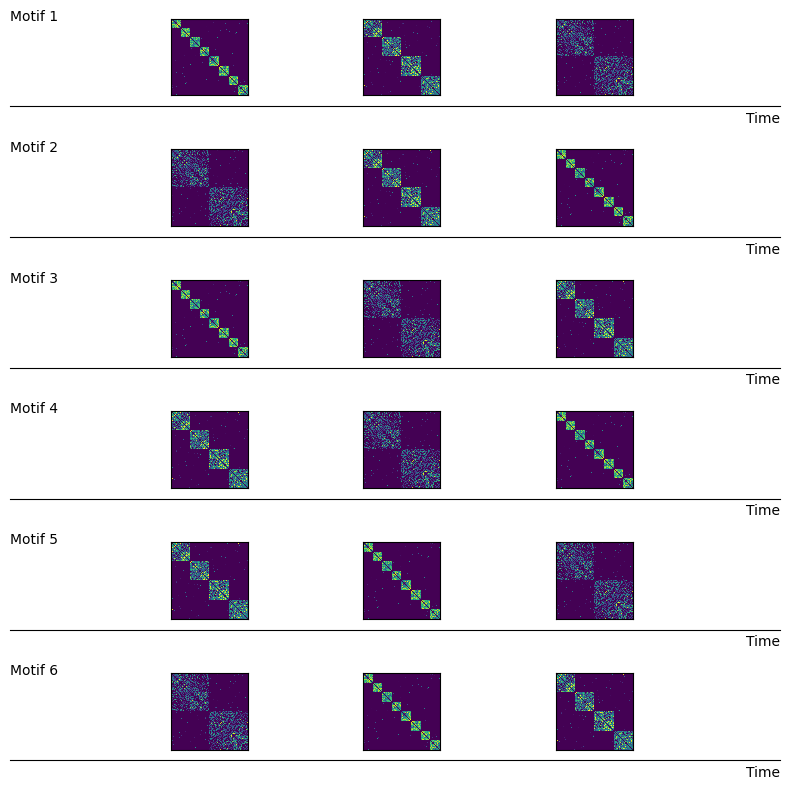

In [6]:
# Start creating the figure
fig = plt.figure(figsize=(8, 8))  # Wider figure for all plots in one row
gs = fig.add_gridspec(len(motifs), 1)  # Grid: 1 row, 4 columns

for m, matrices in enumerate(motifs):
    # Column 1: Plot A
    ax_a = fig.add_subplot(gs[m, 0])

    ax_a.set_xlabel("Time", loc='right')
    ax_a.set_title(f"Motif {m+1}", loc='left', fontsize=10)

    # Add inset plots for the matrices inside Plot A
    positions = [-0.25, 0.0, 0.25]  # Horizontal positions for the insets
    for i, (matrix, pos) in enumerate(zip(matrices, positions)):
        inset_ax = inset_axes(ax_a, width="100%", height="100%", loc="lower left", 
                            bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax_a.transAxes)
        inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
        inset_ax.set_xticks([])
        inset_ax.set_yticks([])

    # hide the y-axis

    ax_a.set_yticks([])
    ax_a.set_xticks([])
    ax_a.spines['top'].set_visible(False)
    ax_a.spines['right'].set_visible(False)
    ax_a.spines['left'].set_visible(False)

plt.tight_layout()

#plt.savefig('/home/b/skoove/Desktop/evolving_SBM/evolving_SBM_6motifs_fig.eps', format='eps', dpi=300)


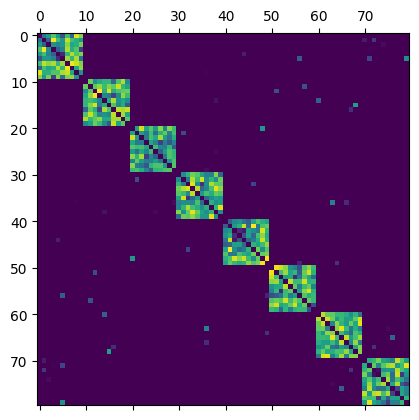

In [7]:
plt.matshow(matrix1)

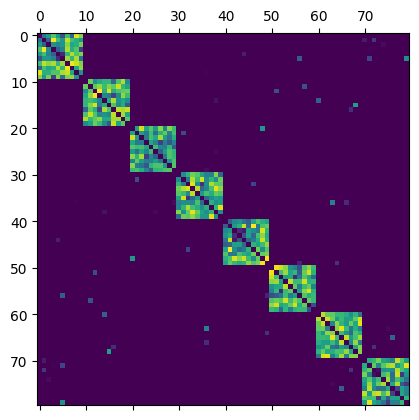

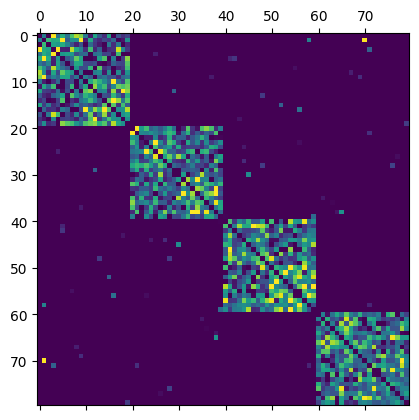

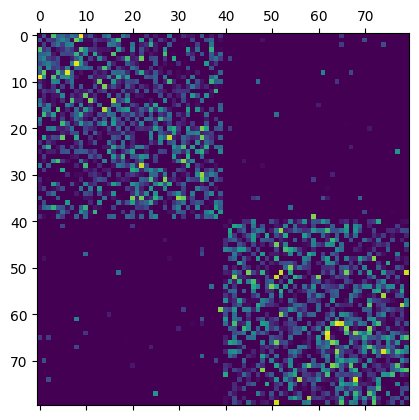

In [10]:
plt.matshow(matrix1)
plt.savefig('/home/b/skoove/Desktop/evolving_SBM/8blocks_fig.png', format='png', dpi=300, bbox_inches='tight')
plt.matshow(matrix2)
plt.savefig('/home/b/skoove/Desktop/evolving_SBM/4blocks_fig.png', format='png', dpi=300, bbox_inches='tight')
plt.matshow(matrix3)
plt.savefig('/home/b/skoove/Desktop/evolving_SBM/2blocks_fig.png', format='png', dpi=300, bbox_inches='tight')